In [1]:
# ! python extractPSFParameters.py

In [24]:
# import numpy as np
# [(int(np.round(i)) - 1)*.06+.06 for i in np.logspace(0, 3, 15)]

In [1]:
import matplotlib.pyplot as plt
from analyzePSFParameters import psfParameters
test = psfParameters(source='data')

## Centroid motion

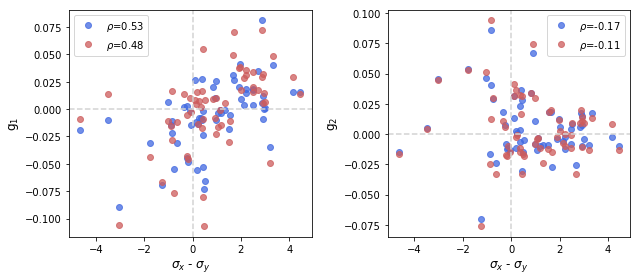

In [34]:
import numpy as np
diffs = test.centroidSigmas['a']['x']-test.centroidSigmas['a']['y']

a1 = np.corrcoef(test.parameters['15']['DSSI']['a']['g1'][:,-1], diffs, rowvar=False)[0,-1]
b1 = np.corrcoef(test.parameters['15']['DSSI']['b']['g1'][:,-1], diffs, rowvar=False)[0,-1]
a2 = np.corrcoef(test.parameters['15']['DSSI']['a']['g2'][:,-1], diffs, rowvar=False)[0,-1]
b2 = np.corrcoef(test.parameters['15']['DSSI']['b']['g2'][:,-1], diffs, rowvar=False)[0,-1]

plt.figure(figsize=(9,4))
plt.subplot(121)
plt.plot(diffs, test.parameters['15']['DSSI']['a']['g1'][:,-1], 'o', color=test.col['a'], alpha=.75, label=fr'$\rho$={a1:.2f}')
plt.plot(diffs, test.parameters['15']['DSSI']['b']['g1'][:,-1], 'o', color=test.col['b'], alpha=.75, label=fr'$\rho$={b1:.2f}')
plt.axhline(0, linestyle='--', color='lightgray')
plt.axvline(0, linestyle='--', color='lightgray')
plt.ylabel('g$_1$', fontsize=12)
plt.xlabel('$\sigma_x$ - $\sigma_y$', fontsize=12)
plt.legend()

plt.subplot(122)
plt.plot(diffs, test.parameters['15']['DSSI']['a']['g2'][:,-1], 'o', alpha=.75, color=test.col['a'], label=fr'$\rho$={a2:.2f}')
plt.plot(diffs, test.parameters['15']['DSSI']['b']['g2'][:,-1], 'o', alpha=.75, color=test.col['b'], label=fr'$\rho$={b2:.2f}')
plt.xlabel('$\sigma_x$ - $\sigma_y$', fontsize=12)
plt.axhline(0, linestyle='--', color='lightgray')
plt.axvline(0, linestyle='--', color='lightgray');
plt.ylabel('g$_2$', fontsize=12);
plt.legend()

plt.tight_layout()

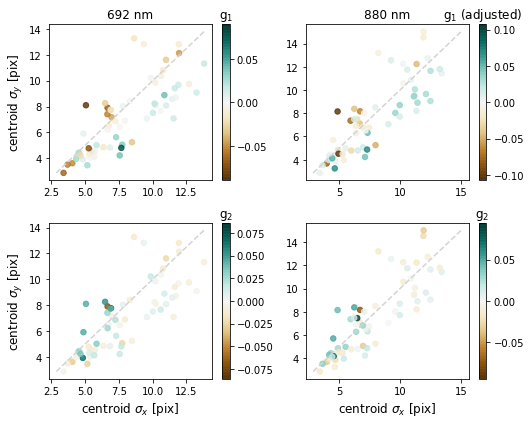

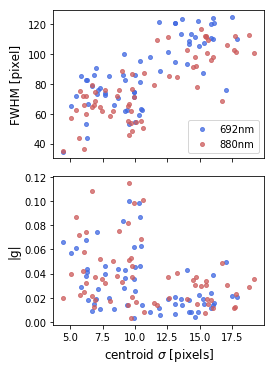

In [29]:
test.loadParameterSet(psfN='15', pix='DSSI')
test.plotCentroids(figsize=(7.5,6), adjust=True, s=30, cmap='BrBG')

## Image quality

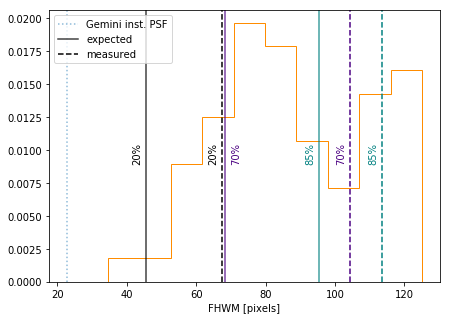

In [63]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats

fig = plt.figure(figsize=(7,5))

ax = plt.subplot(111)
ax.hist(test.parameters['15']['DSSI']['a']['size'][:,-1], histtype='step', density=True, color='darkorange')
a_quants = np.quantile(test.parameters['15']['DSSI']['a']['size'][:,-1], [.2,.7,.85])
ax.set_xlabel('FHWM [pixels]')
lims = ax.axis()
ax.axvline(22.7, alpha=0.5, linestyle=':', label='Gemini inst. PSF')
ax.axvline(45.5, linestyle='-', color='k', alpha=0.75, label='expected IQ')
ax.text(45.5-4, .01, '20%', color='k', rotation=90)
ax.axvline(68.2, linestyle='-', color='indigo', alpha=0.75)
ax.text(68.2+2, .01, '70%', color='indigo', rotation=90)
ax.axvline(95.5, linestyle='-', color='teal', alpha=0.75)
ax.text(95.5-4, .01, '85%', color='teal', rotation=90)
ax.axvline(a_quants[0], linestyle='--', color='k', label='measured IQ')
ax.text(a_quants[0]-4, .01, '20%', color='k', rotation=90)
ax.axvline(a_quants[1], linestyle='--', color='indigo')
ax.text(a_quants[1]-4, .01, '70%', color='indigo', rotation=90)
ax.axvline(a_quants[2], linestyle='--', color='teal')
ax.text(a_quants[2]-4, .01, '85%', color='teal', rotation=90)

# ax.hist(test.parameters['15']['DSSI']['b']['size'][:,-1], histtype='step', density=True, label='b')

# mu=-.5174
# sig=.452
# xpts = np.linspace(lims[0],lims[1], 100)
# ax2 = fig.add_subplot(111, label="2", frame_on=False)
# ax2.plot(xpts*.011, scipy.stats.lognorm.pdf(xpts*.011, scale=np.exp(mu), s=sig), color='teal', label='DIMM seeing')
# ax2.set_xlim((lims[0]*.011, lims[1]*.011))
# ax2.set_xticks([])
# ax2.set_yticks([])

ax.legend(loc=2)
plt.show()

## Plot ellipticity components

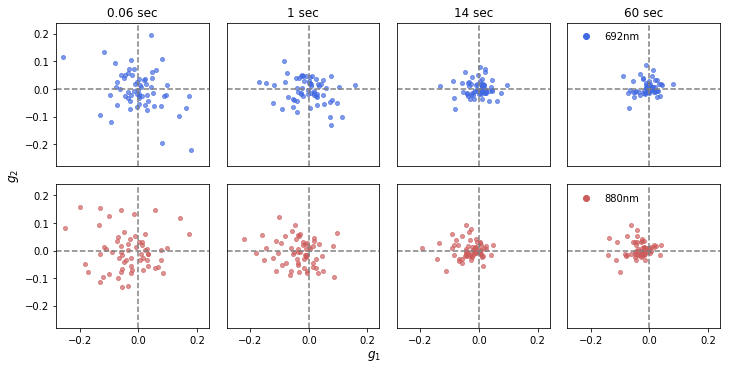

In [43]:
test.loadParameterSet(psfN='15', pix='DSSI')
test.plotEComps(pix='DSSI', save=False);

## Compare 30s PSF parameters:

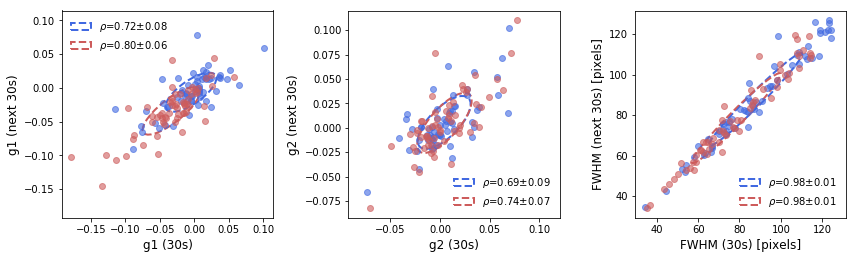

In [3]:
test.analyzeBinnedParameters('DSSI')
test.plotBinnedParameters('DSSI', psfN='2', figsize=(12,3.7), ellipse=True, 
                          ellipseArgs={'linewidth':2, 'linestyle':'--'})

## 15 sec ellipticity

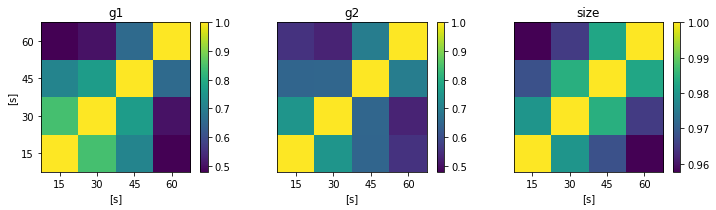

In [45]:
import numpy as np
plt.figure(figsize=(12,2.75))
fifteenSec = np.ones((3,4,4))
for k in range(3):
    param = ['g1','g2','size'][k]
    for i in range(4):
        for j in range(i,4):
            if i!=j:
                fifteenSec[k,i,j] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']
                fifteenSec[k,j,i] = test.R['4']['DSSI'][param]['a'][f'{i}{j}']

vmin, vmax = np.min(fifteenSec[:2]), np.max(fifteenSec[:2])
for k in range(3):
    param = ['g1','g2','size'][k]
    plt.subplot(1,3,k+1)
    if k<2:
        plt.imshow(fifteenSec[k], origin='lower', vmin=vmin, vmax=vmax)
    else: plt.imshow(fifteenSec[k], origin='lower')
    plt.colorbar()
    plt.title(param)
    plt.xticks([0,1,2,3],[15,30,45, 60])
    if k == 0: 
        plt.ylabel('[s]')
        plt.yticks([0,1,2,3],[15,30,45, 60])
    else: plt.yticks([])
    plt.xlabel('[s]')
plt.show()

In [46]:
sorted_idx_a = np.argsort(test.parameters['4']['DSSI']['a']['size'].mean(axis=1))
sorted_idx_b = np.argsort(test.parameters['4']['DSSI']['b']['size'].mean(axis=1))

good1a = test.parameters['4']['DSSI']['a']['g1'][sorted_idx_a[:31]]
bad1a = test.parameters['4']['DSSI']['a']['g1'][sorted_idx_a[31:]]
good2a = test.parameters['4']['DSSI']['a']['g2'][sorted_idx_a[:31]]
bad2a = test.parameters['4']['DSSI']['a']['g2'][sorted_idx_a[31:]]

good1b = test.parameters['4']['DSSI']['a']['g1'][sorted_idx_b[:31]]
bad1b = test.parameters['4']['DSSI']['a']['g1'][sorted_idx_b[31:]]
good2b = test.parameters['4']['DSSI']['a']['g2'][sorted_idx_b[:31]]
bad2b = test.parameters['4']['DSSI']['a']['g2'][sorted_idx_b[31:]]

pairs = [l for k in [[(i,j) for j in range(i,4) if i!=j] for i in range(4)] for l in k]
good1aRs = {f'{i}{j}': np.corrcoef(good1a[:,i], good1a[:,j], rowvar=False)[0,-1] for (i,j) in pairs}
bad1aRs = {f'{i}{j}': np.corrcoef(bad1a[:,i], bad1a[:,j], rowvar=False)[0,-1] for (i,j) in pairs}
good2aRs = {f'{i}{j}': np.corrcoef(good2a[:,i], good2a[:,j], rowvar=False)[0,-1] for (i,j) in pairs}
bad2aRs = {f'{i}{j}': np.corrcoef(bad2a[:,i], bad2a[:,j], rowvar=False)[0,-1] for (i,j) in pairs}
good1bRs = {f'{i}{j}': np.corrcoef(good1b[:,i], good1b[:,j], rowvar=False)[0,-1] for (i,j) in pairs}
bad1bRs = {f'{i}{j}': np.corrcoef(bad1b[:,i], bad1b[:,j], rowvar=False)[0,-1] for (i,j) in pairs}
good2bRs = {f'{i}{j}': np.corrcoef(good2b[:,i], good2b[:,j], rowvar=False)[0,-1] for (i,j) in pairs}
bad2bRs = {f'{i}{j}': np.corrcoef(bad2b[:,i], bad2b[:,j], rowvar=False)[0,-1] for (i,j) in pairs}

In [47]:
def plotRvT(good1Rs, bad1Rs, good2Rs, bad2Rs):
    close, medium, far = ['01', '12', '23'], ['02', '13'], ['03']

    plotGood1 = [np.mean([good1Rs[k] for k in key_list]) for key_list in [close,medium,far]]
    plotBad1 = [np.mean([bad1Rs[k] for k in key_list]) for key_list in [close,medium,far]]
    plotGood2 = [np.mean([good2Rs[k] for k in key_list]) for key_list in [close,medium,far]]
    plotBad2 = [np.mean([bad2Rs[k] for k in key_list]) for key_list in [close,medium,far]]
    
    plt.figure(figsize=(10,4))
    ax1 = plt.subplot(121)
    ax2 = plt.subplot(122)
    for i in range(3):
        ax1.plot([0,0,0],[good1Rs[k] for k in close], '^', color='darkblue')
        ax1.plot([0,0,0],[bad1Rs[k] for k in close], 'o', color='darkorange')
        ax2.plot([0,0,0],[good2Rs[k] for k in close], '^', color='darkblue')
        ax2.plot([0,0,0],[bad2Rs[k] for k in close], 'o', color='darkorange')

    for i in range(2):
        ax1.plot([1,1],[good1Rs[k] for k in medium], '^', color='darkblue')
        ax1.plot([1,1],[bad1Rs[k] for k in medium], 'o', color='darkorange')
        ax2.plot([1,1],[good2Rs[k] for k in medium], '^', color='darkblue')
        ax2.plot([1,1],[bad2Rs[k] for k in medium], 'o', color='darkorange')

    ax1.plot([2],[good1Rs[k] for k in far], '^', color='darkblue', label='better seeing')
    ax1.plot([2],[bad1Rs[k] for k in far], 'o', color='darkorange', label='worse seeing')
    ax2.plot([2],[good2Rs[k] for k in far], '^', color='darkblue')
    ax2.plot([2],[bad2Rs[k] for k in far], 'o', color='darkorange')

    ax1.plot(plotGood1, '--', color='darkblue', alpha=0.5)
    ax2.plot(plotGood2, '--', color='darkblue', alpha=0.5)
    ax1.plot(plotBad1, '--', color='darkorange', alpha=0.75)
    ax2.plot(plotBad2, '--', color='darkorange', alpha=0.75)

    ax1.set_xticks([0,1,2])
    ax1.set_xticklabels(['15','30','45'])
    ax2.set_xticks([0,1,2])
    ax2.set_xticklabels(['15','30','45'])
    ax1.legend()
    ax1.set_ylabel(r'$\rho$')
    ax1.set_xlabel('$\Delta$ t [s]')
    ax2.set_xlabel('$\Delta$ t [s]')

    ax1.set_title('g1')
    ax1.set_title('g2')

    ax1.set_ylim([.2,.9])
    ax2.set_ylim([.2,.9])
    plt.show()

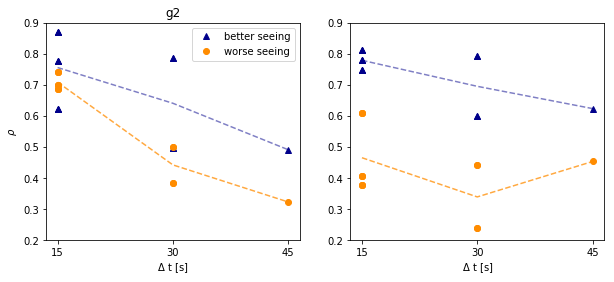

In [48]:
plotRvT(good1aRs, bad1aRs, good2aRs, bad2aRs)

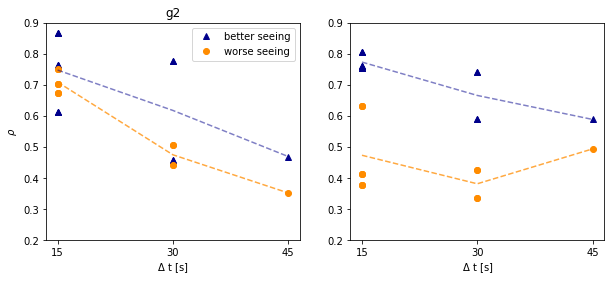

In [49]:
plotRvT(good1bRs, bad1bRs, good2bRs, bad2bRs)

## Plot ellipticity dropoff

In [5]:
import numpy as np
def addExpTimeAxis(fig, subplotN, fntsize=12, label=True, tickLabels=True):
    logAx = fig.add_subplot(subplotN, label="2", frame_on=False)
    logAx.set_yticks([])
    if label: 
        logAx.set_xlabel('exposure time [sec]', fontsize=fntsize)
    logAx.set_xscale('log')
    logAx.set_xlim((0.055,.068*1000))
    logAx.set_xticks([.06, 1, 10, 60])
    if tickLabels: 
        logAx.set_xticklabels([.06, 1, 10, 60])
    else:
        logAx.set_xticklabels([])
    return logAx

def makeBoxPlot(fig, subplotN, data, mainColor, meanColor, xLabel=True, hline=True, fliers=False):
    ax = fig.add_subplot(subplotN)
    if hline:
        plt.axhline(0, color='gray', linewidth=1, alpha=.75)

    bp = ax.boxplot(data, whis=[15.9,84.1], showmeans=True, meanline=True,
                    meanprops={'color':meanColor, 'linewidth':7}, 
                    boxprops={'linewidth':1, 'color':mainColor, 'facecolor':mainColor, 'alpha':0.8}, 
                    medianprops={'linewidth':0},
                    sym='', widths=.2, patch_artist=True)
    ax.set_xticks([])
    ax.set_xticklabels([])
    logAx = addExpTimeAxis(fig, subplotN, label=xLabel, tickLabels=xLabel)

    for element in ['whiskers', 'caps']:
        plt.setp(bp[element], color=mainColor, linewidth=2, alpha=.8)
    if fliers: plt.setp(bp['fliers'], alpha=.75, ms=3, markeredgecolor=mainColor)
    return ax, logAx, bp


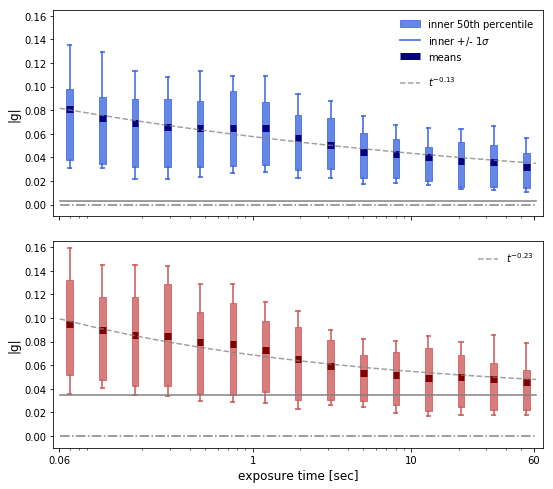

In [80]:
import numpy as np
from scipy.optimize import curve_fit

pix = 'DSSI'
fntsize=12
fixed_asymptote = False

ellipticity = np.array([np.sqrt(test.parameters['15'][pix]['a']['g1']**2 +
                                test.parameters['15'][pix]['a']['g2']**2),
                        np.sqrt(test.parameters['15'][pix]['b']['g1']**2 +
                                test.parameters['15'][pix]['b']['g2']**2)])

expectedAsymptote = np.array([np.sqrt(test.parameters['15'][pix]['a']['g1'].mean()**2 +
                                      test.parameters['15'][pix]['a']['g2'].mean()**2),
                              np.sqrt(test.parameters['15'][pix]['b']['g1'].mean()**2 +
                                      test.parameters['15'][pix]['b']['g2'].mean()**2)])

def power_law_a(t, alpha, a, e0):
    if fixed_asymptote:
        return a * t**alpha + e0, a * t**alpha + e0
    else:
        return a * t**alpha + expectedAsymptote[0]
def power_law_b(t, alpha, a, e0):
    if fixed_asymptote:
        return a * t**alpha + e0, a * t**alpha + e0
    else:
        return a * t**alpha + expectedAsymptote[1]

fig = plt.figure(1, figsize=(8, 7))
pts = np.logspace(-1.22,1.79,15)

## fits
yA = np.mean(ellipticity[0], axis=0)
pA, cA = curve_fit(power_law_a, xdata=pts, ydata=yA, p0=[-.2, 0.5, 0], bounds=[[-1,-np.inf, 0], [0, np.inf, np.inf]])

yB = np.mean(ellipticity[1], axis=0)
pB, cB = curve_fit(power_law_b, xdata=pts, ydata=yB, p0=[-.2, 0.5, 0], bounds=[[-1,-np.inf, 0], [0, np.inf, np.inf]])

## filter a
ax, logAx, bp = makeBoxPlot(fig, 211, ellipticity[0], mainColor='royalblue', meanColor='navy', 
                            xLabel=False, hline=False)
logAx.plot(pts, power_law_a(pts, pA[0], pA[1], pA[2]), '--', color='gray', alpha=0.75, 
           label='$t^{{{:.2f}}}$'.format(pA[0]))
logAx.legend(frameon=False, bbox_to_anchor = [0.84, 0.73])
ax.legend([bp["boxes"][0],bp["whiskers"][0],bp["means"][0]], 
          ['inner 50th percentile', 'inner +/- 1$\sigma$', 'means'],
          frameon=False)
if not fixed_asymptote: logAx.plot(pts, expectedAsymptote[0]*np.ones(15), color='gray')
logAx.plot(pts, pA[2]*np.ones(15), color='gray', ls='-.')
ax.set_ylabel('|g|', fontsize=fntsize)
ax.set_ylim([-0.01,.165])
logAx.set_ylim([-0.01,.165])

## filter b
ax2, logAx2, bp2 = makeBoxPlot(fig, 212, ellipticity[1], mainColor='indianred', meanColor='maroon', 
                               hline=False)
logAx2.plot(pts, power_law_b(pts, pB[0], pB[1], pB[2]), '--', color='gray', alpha=0.75, 
           label='$t^{{{:.2f}}}$'.format(pB[0]))
logAx2.legend(frameon=False)
if not fixed_asymptote: logAx2.plot(pts, expectedAsymptote[1]*np.ones(15), color='gray')
logAx2.plot(pts, pB[2]*np.ones(15), color='gray', ls='-.')
ax2.set_ylabel('|g|', fontsize=fntsize)
ax2.set_ylim([-.01,.165])
logAx2.set_ylim([-.01,.165])

plt.tight_layout()
# plt.savefig('../Plots/gmag_percentiles_fit_wb.png', dpi=300, bbox_to_inches='tight')
plt.show()

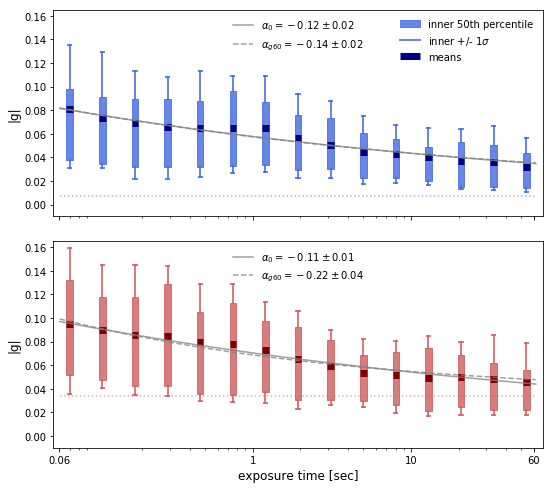

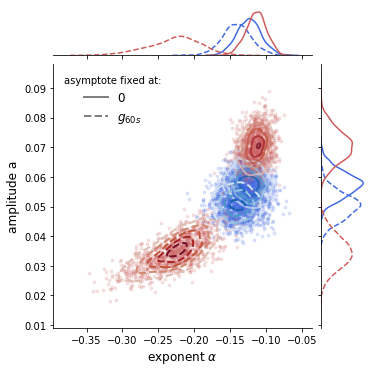

In [3]:
import matplotlib.pyplot as plt
from analyzePSFParameters import psfParameters
test = psfParameters(source='data')
test.loadParameterSet(psfN='15', pix='DSSI')
test.analyzeEMag(pix='DSSI', plot=True, expectedAsymptote=True)